In [1]:
# NAME: Vishakha Dixit
# STUDENT ID: 801265288
# HW-1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Read the dataset
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [2]:
cols = ['price','area','bedrooms','bathrooms','stories','parking']

In [3]:
# Providing seed to split test set & training set.
np.random.seed(0)
train_set, test_set = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 0)
test_set.shape

(109, 13)

In [4]:
# PROBLEM 1

In [5]:
# a) Develop a gradient decent training and evaluation code that predicts housing price based 
# on the following input: area, bedrooms, bathrooms, stories, parking

In [6]:
def getMseLoss(X, Y, theta):
    H = X.dot(theta)
    sqErr = np.square(np.subtract(H, Y))
    avg_loss = 1/(2*m_train) * np.sum(sqErr)
    return avg_loss

def calGradDescent(X_train, Y_train, X_test, Y_test, theta, alpha, epoch):
    mse_train = np.zeros(epoch)
    mse_test = np.zeros(epoch)
    
    for i in range(epoch):
        H = X_train.dot(theta)
        err = np.subtract(H, Y_train)
        vectored_grad = (alpha/m_train) * X_train.transpose().dot(err);
        theta = theta - vectored_grad
        mse_train[i] = getMseLoss(X_train, Y_train, theta)
        mse_test[i] = getMseLoss(X_test, Y_test, theta)
    
    return theta, mse_train, mse_test

In [7]:
# Training values
X_train = train_set.values[:,(1,2,3,4,10)]
m_train = len(train_set)
X_0_train = np.ones((m_train,1))
X_train = np.hstack((X_0_train, X_train))  

Y_train = train_set.values[:,0]

# Testing values
X_test = test_set.values[:,(1,2,3,4,10)]
m_test = len(test_set)
X_0_test = np.ones((m_test, 1))
X_test = np.hstack((X_0_test, X_test)) 

Y_test = test_set.values[:,0]

In [8]:
theta = [0. ,0. ,0. ,0. ,0. ,0.]
epochs = 1500; 
LR = 0.000000001; # Small learning rate becuase don't have normailziation or standardiztion

In [9]:
theta, mse_train, mse_test = calGradDescent(X_train, Y_train, X_test, Y_test, theta, LR, epochs)
print ('Final value of theta = ', theta)
print('Final Cost = ', mse_train[-1])
print(mse_test)

Final value of theta =  [0.6554722777605252 861.0354203106162 2.431403594124969 1.3138920567710255
 2.0031409109157563 0.6179965674539345]
Final Cost =  1704608289167.7373
[2.97416917e+12 2.81053668e+12 2.65708808e+12 ... 3.87664407e+11
 3.87664406e+11 3.87664405e+11]


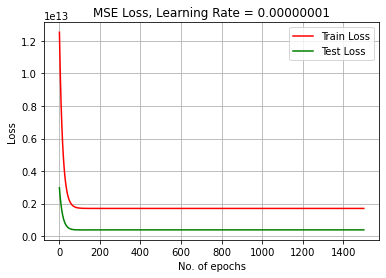

In [10]:
plt.plot(range(1, epochs+1), mse_train, color='red', label="Train Loss")
plt.plot(range(1, epochs+1), mse_test, color='green', label="Test Loss")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.title('MSE Loss, Learning Rate = 0.00000001')
plt.legend()

In [11]:
# b) Develop a gradient decent training and evaluation code that predicts housing price based 
# on the following input: Area, bedrooms, bathrooms, stories, mainroad, guestroom, 
# basement, hotwaterheating, airconditioning, parking, prefarea

In [12]:
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","stories","parking"]))

# Maping the yes/no inputs to 1 and 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea",]
housing[cols] = housing[cols].apply(binary_map)
housing = housing.to_numpy()

np.random.seed(0) 

# Split data in test sets & training set
train_set, test_set = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)
# Total samples for training
m = len(train_set) 

# Training Values
Y_train = train_set[:,0]
X_train = train_set[:,1:]
X0 = np.ones((len(X_train), 1))
X_train = np.hstack((X0, X_train))

# Testing values
Y_test = test_set[:,0]
X_test = test_set[:,1:]
X0 = np.ones((len(X_test), 1))
X_test = np.hstack((X0, X_test))

In [13]:
theta = np.zeros(12)
epochs = 1500; 
LR = 0.000000001; # Small learning rate becuase don't have normailziation or standardiztion

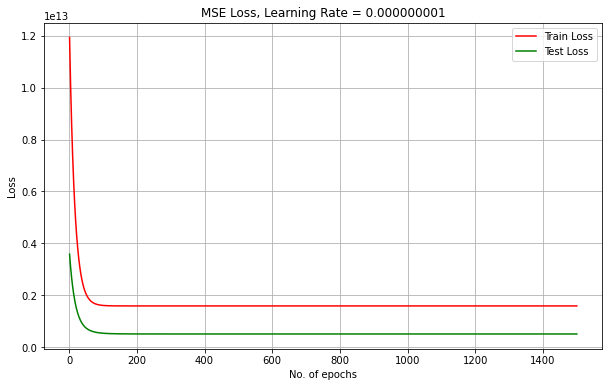

In [14]:
theta, mse_train, mse_test = calGradDescent(X_train, Y_train, X_test, Y_test, theta, LR, epochs)

plt.plot(range(1, epochs+1), mse_train, color='red', label="Train Loss")
plt.plot(range(1, epochs+1), mse_test, color='green', label="Test Loss")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.title('MSE Loss, Learning Rate = 0.000000001')
plt.legend()

In [15]:
# PROBLEM 2

In [16]:
# a) Repeat problem 1 a, this time with input normalization and 
#input standardization as part of your pre-processing logic. 
#You need to perform two separate trainings for standardization and normalization.

In [17]:
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","stories","parking"]))
np.random.seed(0) 

# Split data in test sets & training set
train_set, test_set = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)
# Total samples for training
m = len(train_set) 

# Standardization
sc = StandardScaler()
train_std = sc.fit_transform(train_set)
test_std = sc.fit_transform(test_set)

# Normalization
sc = MinMaxScaler()
train_nrm = sc.fit_transform(train_set)
test_nrm = sc.fit_transform(test_set)

# Standardized Training Values
Y_train_std = train_std[:,0]
X_train_std = train_std[:,1:]
X0 = np.ones((len(X_train_std), 1))
X_train_std = np.hstack((X0, X_train_std))

# Standardized Testing values
Y_test_std = test_std[:,0]
X_test_std = test_std[:,1:]
X0 = np.ones((len(X_test_std), 1))
X_test_std = np.hstack((X0, X_test_std))

# Normalized Training Values
Y_train_nrm = train_nrm[:,0]
X_train_nrm = train_nrm[:,1:]
X0 = np.ones((len(X_train_nrm), 1))
X_train_nrm = np.hstack((X0, X_train_nrm))

# Normalized Testing values
Y_test_nrm = test_nrm[:,0]
X_test_nrm = test_nrm[:,1:]
X0 = np.ones((len(X_test_nrm), 1))
X_test_nrm = np.hstack((X0, X_test_nrm))

In [18]:
theta = np.zeros(6)
epochs = 200; 
LR = 0.01; # Learning rate

theta_std, mse_train_std, mse_test_std = calGradDescent(X_train_std, Y_train_std, X_test_std, Y_test_std, theta, LR, epochs)
print("Theta for std X:", theta_std)

theta_nrm, mse_train_nrm, mse_test_nrm = calGradDescent(X_train_nrm, Y_train_nrm, X_test_nrm, Y_test_nrm, theta, LR, epochs)
print("Theta for nrm X:", theta_nrm)

Theta for std X: [-1.82280287e-16  3.44700504e-01  1.12800927e-01  2.94344536e-01
  2.16521858e-01  1.79525261e-01]
Theta for nrm X: [0.18291307 0.06685144 0.08461235 0.03962789 0.0750097  0.06790245]


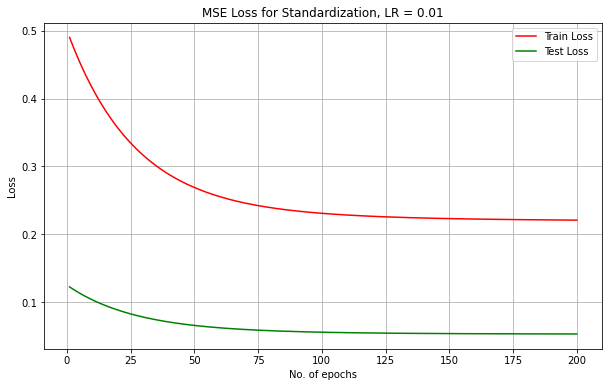

In [19]:
plt.plot(range(1, epochs+1), mse_train_std, color='red', label="Train Loss")
plt.plot(range(1, epochs+1), mse_test_std, color='green', label="Test Loss")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.title('MSE Loss for Standardization, LR = 0.01')
plt.legend()

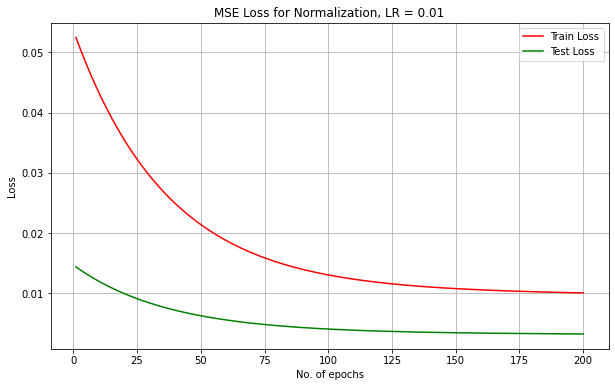

In [20]:
plt.plot(range(1, epochs+1), mse_train_nrm, color='red', label="Train Loss")
plt.plot(range(1, epochs+1), mse_test_nrm, color='green', label="Test Loss")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.title('MSE Loss for Normalization, LR = 0.01')
plt.legend()

In [21]:
# b) Repeat problem 1 b, this time with input normalization and 
#input standardization as part of your pre-processing logic. 
#You need to perform two separate trainings for standardization and normalization.

In [22]:
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","stories","parking"]))

# Maping the yes/no inputs to 1 and 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea",]
housing[cols] = housing[cols].apply(binary_map)
housing = housing.to_numpy()

np.random.seed(0) 

# Split data in test sets & training set
train_set, test_set = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)
# Total samples for training
m = len(train_set) 

# Standardization
sc = StandardScaler()
train_std = sc.fit_transform(train_set)
test_std = sc.fit_transform(test_set)

# Normalization
sc = MinMaxScaler()
train_nrm = sc.fit_transform(train_set)
test_nrm = sc.fit_transform(test_set)

# Standardized Training Values
Y_train_std = train_std[:,0]
X_train_std = train_std[:,1:]
X0 = np.ones((len(X_train_std), 1))
X_train_std = np.hstack((X0, X_train_std))

# Standardized Testing values
Y_test_std = test_std[:,0]
X_test_std = test_std[:,1:]
X0 = np.ones((len(X_test_std), 1))
X_test_std = np.hstack((X0, X_test_std))

# Normalized Training Values
Y_train_nrm = train_nrm[:,0]
X_train_nrm = train_nrm[:,1:]
X0 = np.ones((len(X_train_nrm), 1))
X_train_nrm = np.hstack((X0, X_train_nrm))

# Normalized Testing values
Y_test_nrm = test_nrm[:,0]
X_test_nrm = test_nrm[:,1:]
X0 = np.ones((len(X_test_nrm), 1))
X_test_nrm = np.hstack((X0, X_test_nrm))

In [23]:
theta = np.zeros(12)
epochs = 100; 
LR = 0.01; # Learning rate

theta_std, mse_train_std, mse_test_std = calGradDescent(X_train_std, Y_train_std, X_test_std, Y_test_std, theta, LR, epochs)
print("Theta for std X: ", theta_std)

epochs = 200; 
theta_nrm, mse_train_nrm, mse_test_nrm = calGradDescent(X_train_nrm, Y_train_nrm, X_test_nrm, Y_test_nrm, theta, LR, epochs)
print("Theta for nrm X: ", theta_nrm)

Theta for std X:  [-1.17673455e-16  2.26181386e-01  1.08532780e-01  2.27919142e-01
  1.59952023e-01  1.04709630e-01  8.50051526e-02  8.23561135e-02
  5.28889473e-02  1.85343324e-01  1.35767552e-01  1.22605847e-01]
Theta for nrm X:  [0.09876011 0.0424534  0.05090327 0.03078117 0.05176705 0.09257468
 0.03097753 0.04277407 0.01129761 0.06826281 0.04467065 0.04124511]


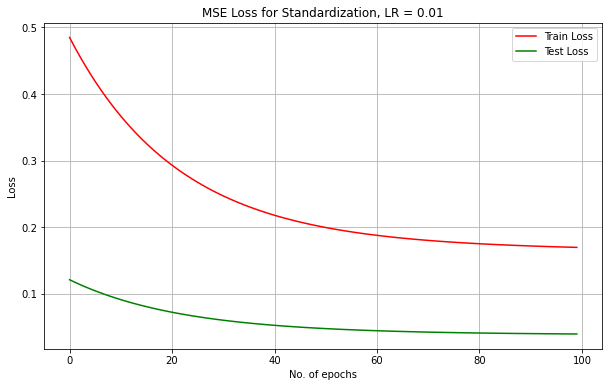

In [24]:
plt.plot(mse_train_std[0:len(mse_train_std)], color='red', label="Train Loss")
plt.plot(mse_test_std[0:len(mse_test_std)], color='green', label="Test Loss")
plt.rcParams['figure.figsize'] = [10, 6]
plt.grid()
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("MSE Loss for Standardization, LR = 0.01")
plt.legend()

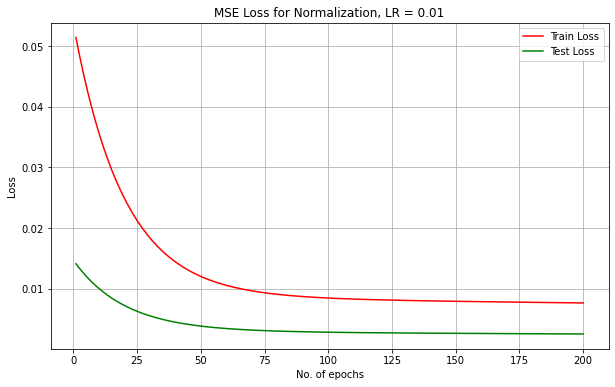

In [25]:
plt.plot(range(1, epochs+1), mse_train_nrm, color='red', label="Train Loss")
plt.plot(range(1, epochs+1), mse_test_nrm, color='green', label="Test Loss")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.title('MSE Loss for Normalization, LR = 0.01')
plt.legend()

In [26]:
# PROBLEM 3

In [27]:
# a) Repeat problem 2 a, this time by adding parameters penalty to your
# loss function. Note that in this case, you need to modify the gradient decent 
# logic for your training set, but you don’t need to change your loss for the evaluation set.

In [28]:
# Adding Penalty for training data
def getMseLoss_train(X, Y, theta):
    H = X.dot(theta)
    sqErr = np.square(np.subtract(H, Y))
    
    # Computer penalty
    reg = np.square(theta[1:]) # Regularization theta 1 to len(theta)
    reg = np.insert(reg, 0, theta[:1], axis=0) # Adding back theta 0
    
    avg_loss = 1/(2*m_train) * (np.sum(sqErr) + np.sum(reg))
    return avg_loss

def calGradDescent(X_train, Y_train, X_test, Y_test, theta, alpha, epoch):
    mse_train = np.zeros(epoch)
    mse_test = np.zeros(epoch)
    
    for i in range(epoch):
        H = X_train.dot(theta)
        err = np.subtract(H, Y_train)
        vectored_grad = (alpha/m_train) * X_train.transpose().dot(err);
        theta = theta - vectored_grad
        mse_train[i] = getMseLoss_train(X_train, Y_train, theta)
        mse_test[i] = getMseLoss(X_test, Y_test, theta)
    
    return theta, mse_train, mse_test

In [29]:
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","stories","parking"]))
np.random.seed(0) 

# Split data in test sets & training set
train_set, test_set = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)
# Total samples for training
m = len(train_set) 

# Standardization
sc = StandardScaler()
train_std = sc.fit_transform(train_set)
test_std = sc.fit_transform(test_set)

# Normalization
sc = MinMaxScaler()
train_nrm = sc.fit_transform(train_set)
test_nrm = sc.fit_transform(test_set)

# Standardized Training Values
Y_train_std = train_std[:,0]
X_train_std = train_std[:,1:]
X0 = np.ones((len(X_train_std), 1))
X_train_std = np.hstack((X0, X_train_std))

# Standardized Testing values
Y_test_std = test_std[:,0]
X_test_std = test_std[:,1:]
X0 = np.ones((len(X_test_std), 1))
X_test_std = np.hstack((X0, X_test_std))

# Normalized Training Values
Y_train_nrm = train_nrm[:,0]
X_train_nrm = train_nrm[:,1:]
X0 = np.ones((len(X_train_nrm), 1))
X_train_nrm = np.hstack((X0, X_train_nrm))

# Normalized Testing values
Y_test_nrm = test_nrm[:,0]
X_test_nrm = test_nrm[:,1:]
X0 = np.ones((len(X_test_nrm), 1))
X_test_nrm = np.hstack((X0, X_test_nrm))

In [30]:
theta = np.zeros(6)
epochs = 350; 
LR = 0.01; # Learning rate

theta_std, mse_train_std, mse_test_std = calGradDescent(X_train_std, Y_train_std, X_test_std, Y_test_std, theta, LR, epochs)
print("Theta for std X:", theta_std)

epochs = 250
theta_nrm, mse_train_nrm, mse_test_nrm = calGradDescent(X_train_nrm, Y_train_nrm, X_test_nrm, Y_test_nrm, theta, LR, epochs)
print("Theta for nrm X:", theta_nrm)

Theta for std X: [-2.16564789e-16  3.74385543e-01  8.57123763e-02  3.11901766e-01
  2.30950687e-01  1.72693220e-01]
Theta for nrm X: [0.18584031 0.07262592 0.08822654 0.04499071 0.08095956 0.07360287]


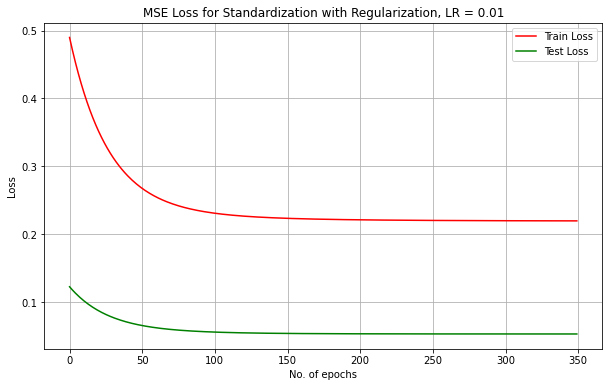

In [31]:
plt.plot(mse_train_std[0:len(mse_train_std)], color='red', label="Train Loss")
plt.plot(mse_test_std[0:len(mse_test_std)], color='green', label="Test Loss")
plt.rcParams['figure.figsize'] = [10, 6]
plt.grid()
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("MSE Loss for Standardization with Regularization, LR = 0.01")
plt.legend()

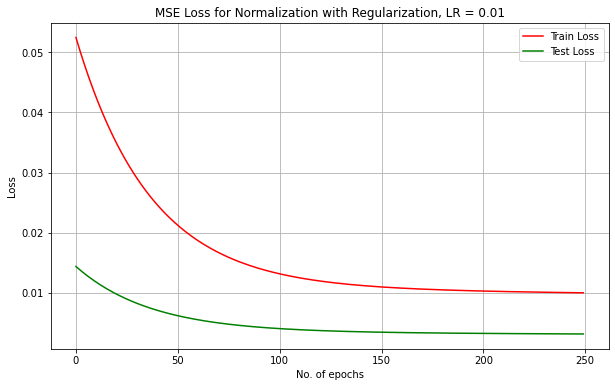

In [32]:
plt.plot(mse_train_nrm[0:len(mse_train_nrm)], color='red', label="Train Loss")
plt.plot(mse_test_nrm[0:len(mse_test_nrm)], color='green', label="Test Loss")
plt.rcParams['figure.figsize'] = [10, 6]
plt.grid()
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("MSE Loss for Normalization with Regularization, LR = 0.01")
plt.legend()

In [33]:
# b) Repeat problem 2 b, this time by adding parameters penalty to your
# loss function. Note that in this case, you need to modify the gradient decent 
# logic for your training set, but you don’t need to change your loss for the evaluation set.

In [34]:
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","stories","parking"]))

# Maping the yes/no inputs to 1 and 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

cols = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea",]
housing[cols] = housing[cols].apply(binary_map)
housing = housing.to_numpy()

np.random.seed(0) 

# Split data in test sets & training set
train_set, test_set = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 42)
# Total samples for training
m = len(train_set) 

# Standardization
sc = StandardScaler()
train_std = sc.fit_transform(train_set)
test_std = sc.fit_transform(test_set)

# Normalization
sc = MinMaxScaler()
train_nrm = sc.fit_transform(train_set)
test_nrm = sc.fit_transform(test_set)

# Standardized Training Values
Y_train_std = train_std[:,0]
X_train_std = train_std[:,1:]
X0 = np.ones((len(X_train_std), 1))
X_train_std = np.hstack((X0, X_train_std))

# Standardized Testing values
Y_test_std = test_std[:,0]
X_test_std = test_std[:,1:]
X0 = np.ones((len(X_test_std), 1))
X_test_std = np.hstack((X0, X_test_std))

# Normalized Training Values
Y_train_nrm = train_nrm[:,0]
X_train_nrm = train_nrm[:,1:]
X0 = np.ones((len(X_train_nrm), 1))
X_train_nrm = np.hstack((X0, X_train_nrm))

# Normalized Testing values
Y_test_nrm = test_nrm[:,0]
X_test_nrm = test_nrm[:,1:]
X0 = np.ones((len(X_test_nrm), 1))
X_test_nrm = np.hstack((X0, X_test_nrm))

In [35]:
theta = np.zeros(12)
epochs = 150; 
LR = 0.01; # Learning rate

theta_std, mse_train_std, mse_test_std = calGradDescent(X_train_std, Y_train_std, X_test_std, Y_test_std, theta, LR, epochs)
print("Theta for std X: ", theta_std)

epochs = 200; 
theta_nrm, mse_train_nrm, mse_test_nrm = calGradDescent(X_train_nrm, Y_train_nrm, X_test_nrm, Y_test_nrm, theta, LR, epochs)
print("Theta for nrm X: ", theta_nrm)

Theta for std X:  [-1.49981964e-16  2.52331927e-01  9.89143691e-02  2.55477105e-01
  1.74533803e-01  1.05755090e-01  8.30721613e-02  9.09756148e-02
  6.63954003e-02  2.01028758e-01  1.39600497e-01  1.35229258e-01]
Theta for nrm X:  [0.09876011 0.0424534  0.05090327 0.03078117 0.05176705 0.09257468
 0.03097753 0.04277407 0.01129761 0.06826281 0.04467065 0.04124511]


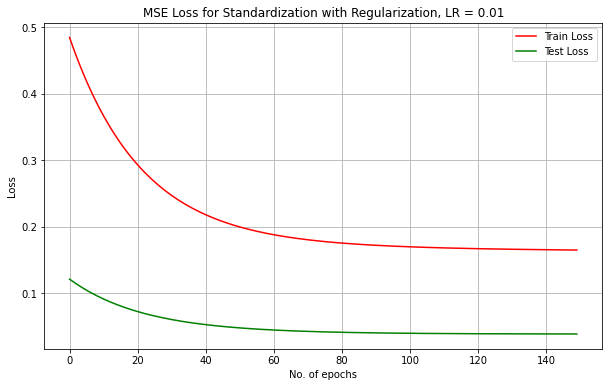

In [36]:
plt.plot(mse_train_std[0:len(mse_train_std)], color='red', label="Train Loss")
plt.plot(mse_test_std[0:len(mse_test_std)], color='green', label="Test Loss")
plt.rcParams['figure.figsize'] = [10, 6]
plt.grid()
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("MSE Loss for Standardization with Regularization, LR = 0.01")
plt.legend()

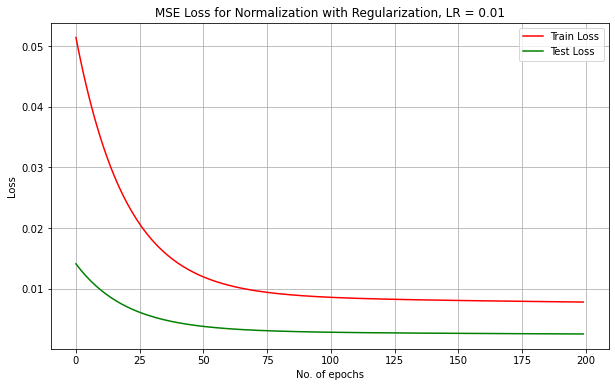

In [37]:
plt.plot(mse_train_nrm[0:len(mse_train_nrm)], color='red', label="Train Loss")
plt.plot(mse_test_nrm[0:len(mse_test_nrm)], color='green', label="Test Loss")
plt.rcParams['figure.figsize'] = [10, 6]
plt.grid()
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("MSE Loss for Normalization with Regularization, LR = 0.01")
plt.legend()